## Import

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('figure', figsize=(10, 6))

from matplotlib import rcParams
rcParams['font.family'] = 'cmsy10'
rcParams['font.size'] = 10
rcParams['axes.unicode_minus'] = False

## Linear Regression
[선형 회귀](https://kimdingko-world.tistory.com/101)  

모델 | 설명
:--- |:---
일반 선형 회귀 | 예측값과 측정값의 오차를 최소화할 수 있도록 회귀 계수를 최적화
릿지(Ridge) | 선형 회귀에 L2 규제를 추가한 모델. L2 규제는 상대적으로 큰 회귀 계수값을 더 작게 만드는 규제 모델
라쏘(Lasso) | 선형 회귀에 L1 규제를 추가한 모델. L1 규체즌 영향력이 작은 피처의 회귀 계수값을 0으로 만드는 규제 모델(피처 선택 기능)
엘라스틱넷(ElasticNet) | L2 규제와 L1 규제를 결합한 모델. 주로 피처가 많은 데이터 셋에 적용
로지스틱 회귀(Logistic Regression) | 분류에 사용되는 선형 회귀 모델

## 경사 하강법  

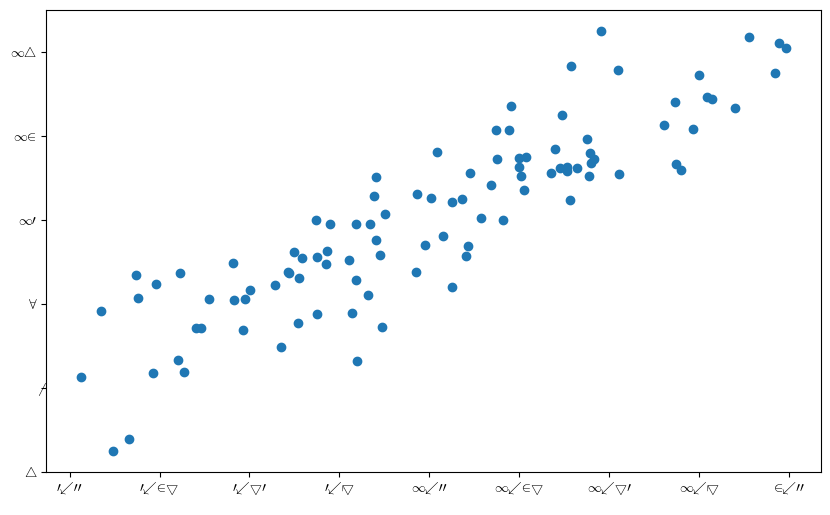

In [ ]:
np.random.seed(123)

# y = 4X + 6 + noise(random)
X = 2 * np.random.rand(100,1)
y = 6 + 4 * X + np.random.randn(100,1)

plt.scatter(X, y)
plt.show()

요걸 관통하는 회귀선을 찾아보자!  

선을 일단 하나 긋고 각 점들에서 직선까지의 수직 거리인 잔차를 구한다.  
잔차의 제곱 합의 평균이 작아지는 방향으로 선을 그으며 찾는다.  

점이 하나 크게 떨어져 있고 나머지에는 적합한 직선의 경우 그냥 잔차의 합 평균으로 하면 다수의 점과 특이점 사이로 이동하니, 하나 틀리더라도 다수에게 맞는게 나으니 잔차 제곱 합의 평균으로 하는 거다.  

어쨌든, 잔차의 제곱 합의 평균인 C값이 가장 작으려면..C값은 최적의 직선이 y=w1x1+b라고 할 때, w1^2, b^2 꼴로 나타나게 된다. y와 x1에는 상수가 들어가니까. 우리는 미지수 w1과 b를 찾으면 된다.  

어떻게 찾냐? dc/dw1=0, dc/db=0을 만족하면 되는 기다(미분).  
2차 함수의 연립방정식으로 찾아야 하는데... 현실적으로는 w1, b만 있는게 아니라 w1, w2....w500, b 이런식으로 너무 많아서 계산이 불가능하다.  

**그래서 나온게 경사하강법이다!**  

w1에 대해 아무거나 넣어서 2차 함수의 어디에 있나 확인한다. 막 넣어보다가 dc/dw1=0에 가장 가까운게 w1이 되는 것.  
미분값이 양수면 더 왼쪽의 숫자를, 음수면 더 오른쪽의 숫자를 넣어가며 찾는다..  
동일한 방식으로 w2, w3...b까지 다 한다.  

위 과정이 바로 model.fit(X_train, y_train)에서 일어나는 것!

### 가중치 업데이트 함수 정의

In [ ]:
# 가중치 업데이트 함수 정의
def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
    N = len(y)

    # w1_update, w0_update 0으로 초기화
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)

    # 예측값 계산 & 오차 계산(실제값 - 예측값)
    y_pred = np.dot(X, w1.T) + w0
    diff = y-y_pred

    # w0_update를 dot 행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성
    w0_factors = np.ones((N,1))

    # w1과 w0을 업데이트할 w1_update와 w0_update 계산
    w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff))
    w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))

    return w1_update, w0_update

### 경사하강법 적용 함수 정의

In [ ]:
# w1, w0 업데이트: iters 만큼 반복 적용
def gradient_descent_steps(X, y, iters=10000):
    # w0, w1초기화
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))

    # w1, w0 업데이트: iters 만큼 반복 적용
    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update

    return w1, w0

### 비용 구하는 함수 정의

In [ ]:
def get_cost(y, y_pred):
    N = len(y)
    cost = np.sum(np.square(y - y_pred))/N
    return cost

### 경사하강법 적용

In [ ]:
# y = 4X + 6

w1, w0 = gradient_descent_steps(X, y, iters=1000)
print('w1:{:.3f} w0:{:.3f}'.format(w1[0,0], w0[0,0]))

y_pred = w1[0,0] * X + w0
print('Gradient Descent Total Cost:{:.4f}'.format(get_cost(y, y_pred)))

w1:4.008 w0:6.009
Gradient Descent Total Cost:0.9624


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54616 (\N{HANGUL SYLLABLE HA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48277 (\N{HANGUL SYLLABLE BEOB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packag

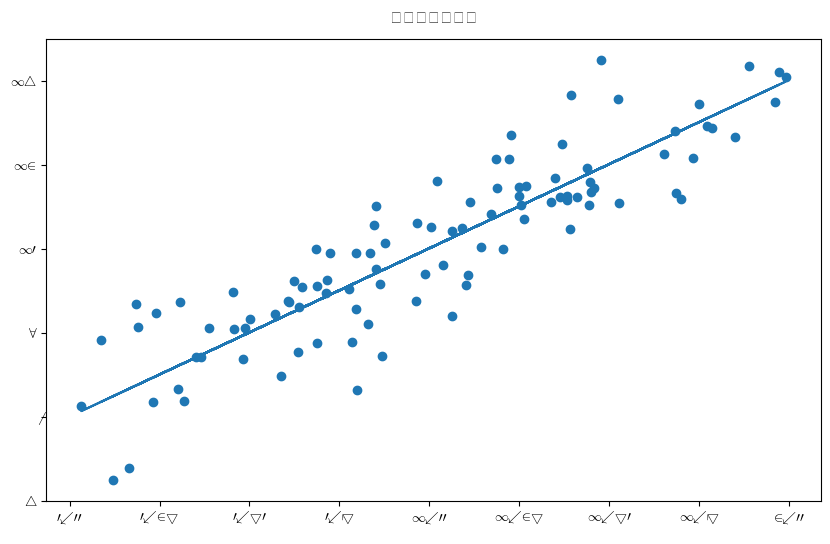

In [ ]:
plt.scatter(X, y)
plt.plot(X,y_pred)
plt.title('경사하강법 적용')
plt.show()

### 확률적 경사하강법(SGD) 적용 함수 정의

In [ ]:
def stochastic_gradient_descent_steps(X, y, batch_size=10, iters=1000):
    # w0, w1초기화
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))

    for ind in range(iters):
        np.random.seed(ind)
        # sample_X, sample_y: batch_size만큼 랜덤 데이터 추출
        stochastic_random_index = np.random.permutation(X.shape[0])
        sample_X = X[stochastic_random_index[0:batch_size]]
        sample_y = y[stochastic_random_index[0:batch_size]]

        # w1, w0 업데이트: 추출된 부분 데이터 사용(sample_X, sample_y)
        w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update

    return w1, w0

### 확률적 경사하강법(SGD) 적용

In [ ]:
# y = 4X + 6

w1, w0 = stochastic_gradient_descent_steps(X, y, iters=1000)
print('w1:{:.3f} w0:{:.3f}'.format(w1[0,0], w0[0,0]))

y_pred = w1[0,0] * X + w0
print('Stochastic Gradient Descent Total Cost:{:.4f}'.format(get_cost(y, y_pred)))

w1:3.992 w0:6.049
Stochastic Gradient Descent Total Cost:0.9611


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54869 (\N{HANGUL SYLLABLE HWAG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47456 (\N{HANGUL SYLLABLE RYUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


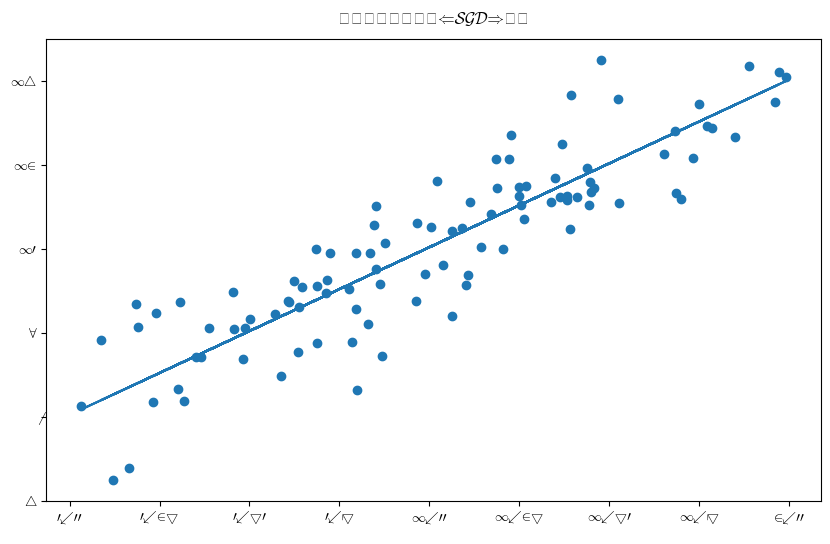

In [ ]:
plt.scatter(X, y)
plt.plot(X,y_pred)
plt.title('확률적 경사하강법(SGD) 적용')
plt.show()

### 선형 회귀 적용

In [ ]:
# 데이터 로딩
df = pd.read_csv('./drive/MyDrive/Colab Notebooks/Machine Learning/boston.csv')
X = df.drop('target', axis=1).values
y = df['target'].values

df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score

In [ ]:
# 데이터 분할
X_train , X_test , y_train , y_test = train_test_split(X , y, random_state=123)

# Linear Regression: 학습
lr = LinearRegression()
lr.fit(X_train ,y_train )

# Linear Regression: 예측, 평가
pred = lr.predict(X_test)
mse  = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)

In [ ]:
print('MSE:',  mse)
print('RMSE:', rmse)
print('R squared score:', r2_score(y_test, pred))

MSE: 24.76853096860876
RMSE: 4.976799269471169
R squared score: 0.6862448857295731


In [ ]:
# 절편
lr.intercept_

32.479664804532774

In [ ]:
# 회귀 계수
lr.coef_

array([-9.78910352e-02,  4.27789348e-02,  5.91493507e-02,  1.23149832e+00,
       -1.54902558e+01,  4.35215724e+00, -4.69136797e-04, -1.37720645e+00,
        2.82085749e-01, -1.24919445e-02, -9.40011503e-01,  6.62260713e-03,
       -5.48551054e-01])

In [ ]:
# 회귀 계수 정렬
coeff = pd.Series(data=np.round(lr.coef_, 1), index=df.drop('target',axis=1).columns )
coeff.sort_values(ascending=False)

RM          4.4
CHAS        1.2
RAD         0.3
INDUS       0.1
ZN          0.0
AGE        -0.0
TAX        -0.0
B           0.0
CRIM       -0.1
LSTAT      -0.5
PTRATIO    -0.9
DIS        -1.4
NOX       -15.5
dtype: float64

In [ ]:
# cross_val_score 적용
from sklearn.model_selection import cross_val_score

lr = LinearRegression()

neg_mse_scores = cross_val_score(lr, X, y, scoring='neg_mean_squared_error', cv=5)

rmse_scores    = np.sqrt(-1 * neg_mse_scores)

avg_rmse = np.mean(rmse_scores)

In [ ]:
print('5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print('5 folds 의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print('5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))

5 folds 의 개별 Negative MSE scores:  [-12.46 -26.05 -33.07 -80.76 -33.31]
5 folds 의 개별 RMSE scores :  [3.53 5.1  5.75 8.99 5.77]
5 folds 의 평균 RMSE : 5.829 


##Polynomial regression 다중 회귀(전처리 법)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

### 데이터 생성

In [ ]:
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

In [ ]:
np.random.seed(123)
n_samples = 30
X = np.sort(np.random.rand(n_samples))

# Cosine + Noise
y = true_fun(X) + np.random.randn(n_samples) * 0.1

### 다항 회귀 적용


Degree 1 회귀 계수는 [-2.] 입니다.
Degree 1 MSE 는 0.25 입니다.

Degree 4 회귀 계수는 [ -0. -14.  19.  -5.] 입니다.
Degree 4 MSE 는 0.09 입니다.

Degree 15 회귀 계수는 [-1.90461000e+05  4.16883300e+06 -5.27988460e+07  4.38679611e+08
 -2.55424421e+09  1.08287495e+10 -3.41790308e+10  8.12335228e+10
 -1.45745889e+11  1.96193935e+11 -1.94940316e+11  1.38607987e+11
 -6.66705227e+10  1.94218949e+10 -2.58595093e+09] 입니다.
Degree 15 MSE 는 724886759455.40 입니다.


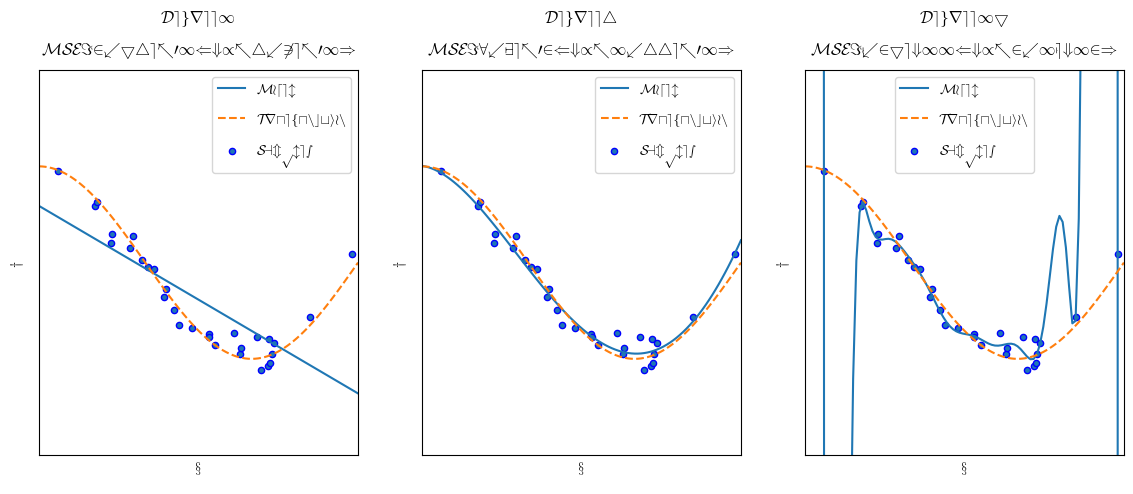

In [ ]:
plt.figure(figsize=(14, 5))
degrees = [1, 4, 15]

# 다항 회귀의 차수(degree)를 1, 4, 15로 각각 변화시키면서 비교합니다.
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    # 개별 degree별로 Polynomial 변환합니다.
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X.reshape(-1, 1), y)

    # 교차 검증으로 다항 회귀를 평가합니다.
    scores = cross_val_score(pipeline, X.reshape(-1,1), y,scoring="neg_mean_squared_error", cv=10)
    coefficients = pipeline.named_steps['linear_regression'].coef_
    print('\nDegree {0} 회귀 계수는 {1} 입니다.'.format(degrees[i], np.round(coefficients),2))
    print('Degree {0} MSE 는 {1:.2f} 입니다.'.format(degrees[i] , -1*np.mean(scores)))

    # 0 부터 1까지 테스트 데이터 세트를 100개로 나눠 예측을 수행합니다.
    # 테스트 데이터 세트에 회귀 예측을 수행하고 예측 곡선과 실제 곡선을 그려서 비교합니다.
    X_test = np.linspace(0, 1, 100)
    # 예측값 곡선
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    # 실제 값 곡선
    plt.plot(X_test, true_fun(X_test), '--', label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")

    plt.xlabel("x"); plt.ylabel("y"); plt.xlim((0, 1)); plt.ylim((-2, 2)); plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(degrees[i], -scores.mean(), scores.std()))

plt.show()

## Regularized Linear Models – Ridge, Lasso, ElasticNet
### Polynomial을 썼을 때 발생하는 문제(과적합 등)를 해결하기 위한 방법책
* 원래 잔차 제곱의 평균 하기 전에 제곱 + 특정값(새로운 w를 추가) 을 더해준다. 여기서 특정값이 Ridge와 Lasso!  
최적의 w값이 10, 5, 20...일 때, 9, 4, 19...처럼 약간의 줄임을 준다.  

* Ridge는 새로운 w의 제곱값을 활용하고 Lasso는 새로운 w의 절댓값을 활용한다.  

* 제곱의 경우 작은 값 w들에는 큰 변화가 없으나 큰 w값의 경우 큰 줄임을 이끈다.  

* Lasso는 똑같이 줄어들기는 하는데, 원래 작았던 애들은 더 작아져서 거의 없어지는 듯한 효과를 이끈다.  
w1이 거의 없어지면 x1이 뭐든 상관 없으니... 차원이 줄어드는 효과가 있다.  

* 추가하는 새로운 w 앞에 람다를 붙여주는데, 그 람다가 얼마냐에 따라 효과를 극대화 극소화시킬 수 있다.  

* Ridge w, Lasso w를 모두 쓰는 건 ElasticNet이라고 한다.

### Ridge regression

In [ ]:
# 데이터 로딩
df = pd.read_csv('./drive/MyDrive/Colab Notebooks/Machine Learning/boston.csv')
X = df.drop('target', axis=1).values
y = df['target'].values
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

In [ ]:
ridge = Ridge(alpha = 10)
# alpha가 위에서 얘기한 람다 값이다.

neg_mse_scores = cross_val_score(ridge, X, y, scoring='neg_mean_squared_error', cv=5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

In [ ]:
print('5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 3))
print('5 folds 의 개별 RMSE scores : ', np.round(rmse_scores,3))
print('5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))

5 folds 의 개별 Negative MSE scores:  [-11.422 -24.294 -28.144 -74.599 -28.517]
5 folds 의 개별 RMSE scores :  [3.38  4.929 5.305 8.637 5.34 ]
5 folds 의 평균 RMSE : 5.518 


In [ ]:
# Ridge에 사용될 alpha 파라미터의 값들을 정의
alphas = [0 , 0.1 , 1 , 10 , 100]

# alphas list 값을 iteration하면서 alpha에 따른 평균 rmse 구함.
for alpha in alphas :
    ridge = Ridge(alpha=alpha)

    #cross_val_score를 이용하여 5 fold의 평균 RMSE 계산
    neg_mse_scores = cross_val_score(ridge, X, y, scoring='neg_mean_squared_error', cv=5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print('alpha {} 일 때 5 folds 의 평균 RMSE: {:.3f}'.format(alpha, avg_rmse))

alpha 0 일 때 5 folds 의 평균 RMSE: 5.829
alpha 0.1 일 때 5 folds 의 평균 RMSE: 5.788
alpha 1 일 때 5 folds 의 평균 RMSE: 5.653
alpha 10 일 때 5 folds 의 평균 RMSE: 5.518
alpha 100 일 때 5 folds 의 평균 RMSE: 5.330


alpha가 작을 수록 규제를 적게 하는 것을 의미한다.  
알파가 작아 규제가 작아지면 w애들이 원래 지들 개성대로 활개치는 거다.  
위에서는 오히려 규제가 작을 수록 결과가 좋았음..

반대로 알파가 커 규제가 큰 건, w를 더 강하게 줄이는 것으로..  
그래프를 과하게 구불구불하게 그리지 않고 러프하게 그리는 것을 의미한다.  
그때 그때 다르긴 하지만, 보통 규제를 강하게 할 수록 over fitting이 작아진다.  

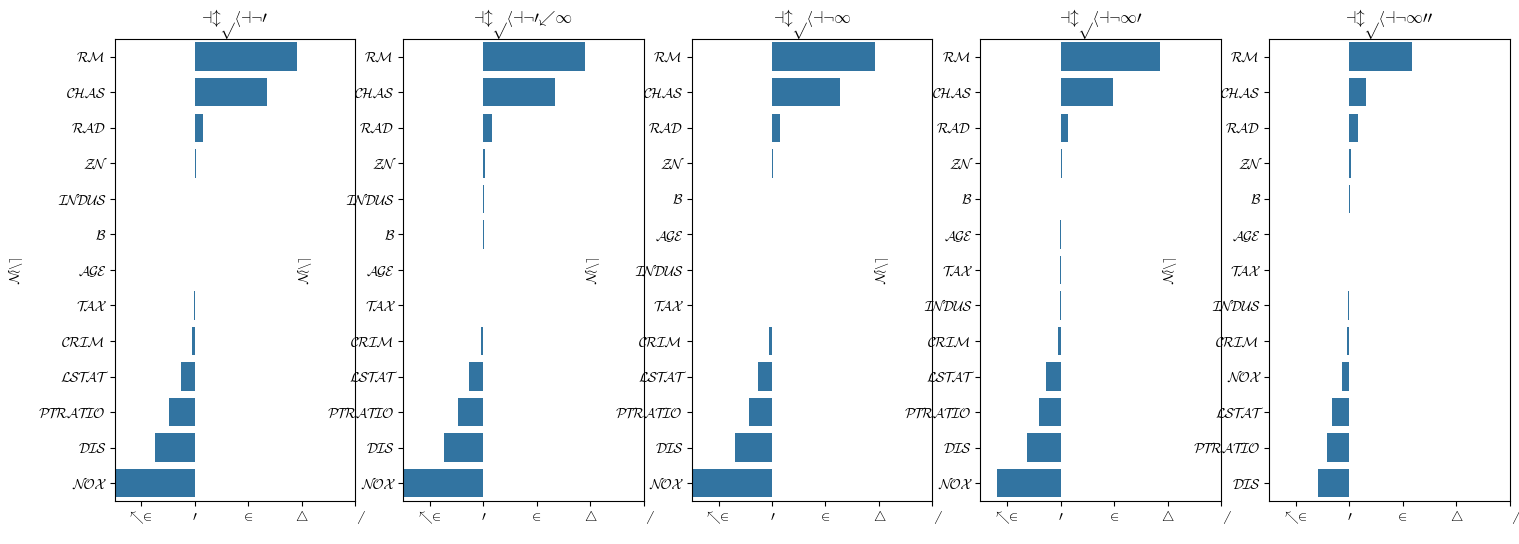

In [ ]:
fig , axs = plt.subplots(figsize=(18,6) , nrows=1 , ncols=5)
coeff_df = pd.DataFrame()

# alphas 리스트 값을 차례로 입력해 회귀 계수 값 시각화 및 데이터 저장. pos는 axis의 위치 지정
for pos , alpha in enumerate(alphas) :
    ridge = Ridge(alpha = alpha)
    ridge.fit(X, y)

    # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가.
    coeff = pd.Series(data=ridge.coef_ , index=df.drop('target',axis=1).columns )
    colname='alpha:'+ str(alpha)
    coeff_df[colname] = coeff

    # 막대 그래프로 각 alpha 값에서의 회귀 계수를 시각화. 회귀 계수값이 높은 순으로 표현
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values , y=coeff.index, ax=axs[pos])

plt.show()

In [ ]:
ridge_alphas = [0 , 0.1 , 1 , 10 , 100]
sort_column = 'alpha:'+ str(ridge_alphas[0])
coeff_df.sort_values(by=sort_column, ascending=False)

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100
RM,3.809865,3.818233,3.854000,3.702272,2.334536
CHAS,2.686734,2.670019,2.552393,1.952021,0.638335
RAD,0.306049,0.303515,0.290142,0.279596,0.315358
ZN,0.046420,0.046572,0.047443,0.049579,0.054496
INDUS,0.020559,0.015999,-0.008805,-0.042962,-0.052826
B,0.009312,0.009368,0.009673,0.010037,0.009393
AGE,0.000692,-0.000269,-0.005415,-0.010707,0.001212
TAX,-0.012335,-0.012421,-0.012912,-0.013993,-0.015856
CRIM,-0.108011,-0.107474,-0.104595,-0.101435,-0.102202
LSTAT,-0.524758,-0.525966,-0.533343,-0.559366,-0.660764


### Lasso regression

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

#### Ridge, Lasso, ElasticNet 모델 적용 함수 정의

In [ ]:
# alpha값에 따른 회귀 모델의 폴드 평균 RMSE를 출력하고 회귀 계수값들을 DataFrame으로 반환

def get_linear_reg_eval(model_name, params=None, X_n=None, y_n=None ):
    coeff_df = pd.DataFrame()

    print('####### ', model_name , '#######')

    for param in params:
        if   model_name =='Ridge': model = Ridge(alpha=param)
        elif model_name =='Lasso': model = Lasso(alpha=param)
        elif model_name =='ElasticNet': model = ElasticNet(alpha=param, l1_ratio=0.7)

        neg_mse_scores = cross_val_score(model, X_n, y_n, scoring='neg_mean_squared_error', cv=5)
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        print('alpha {}일 때 5 폴드 세트의 평균 RMSE: {:.3f}'.format(param, avg_rmse))

        # cross_val_score는 evaluation metric만 반환하므로 모델을 다시 학습하여 회귀 계수 추출
        model.fit(X_n , y_n)
        # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가.
        coeff = pd.Series(data=model.coef_ , index=df.drop('target',axis=1).columns )
        colname='alpha:'+ str(param)
        coeff_df[colname] = coeff

    return coeff_df

In [ ]:
# 라쏘에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval() 함수 호출
lasso_alphas = [0.07, 0.1, 0.5, 1, 3]

coeff_lasso_df = get_linear_reg_eval('Lasso', params=lasso_alphas, X_n=X, y_n=y)

#######  Lasso #######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 5.612
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.615
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 5.669
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.776
alpha 3일 때 5 폴드 세트의 평균 RMSE: 6.189


In [ ]:
# 반환된 coeff_lasso_df를 첫번째 컬럼순으로 내림차순 정렬하여 회귀계수 DataFrame출력
sort_column = 'alpha:'+ str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.789725,3.703202,2.498212,0.949811,0.000000
CHAS,1.434343,0.955190,0.000000,0.000000,0.000000
RAD,0.270936,0.274707,0.277451,0.264206,0.061864
ZN,0.049059,0.049211,0.049544,0.049165,0.037231
B,0.010248,0.010249,0.009469,0.008247,0.006510
NOX,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
AGE,-0.011706,-0.010037,0.003604,0.020910,0.042495
TAX,-0.014290,-0.014570,-0.015442,-0.015212,-0.008602
INDUS,-0.042120,-0.036619,-0.005253,-0.000000,-0.000000
CRIM,-0.098193,-0.097894,-0.083289,-0.063437,-0.000000


### ElasticNet regression

In [ ]:
from sklearn.linear_model import ElasticNet

In [ ]:
# 엘라스틱넷에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval() 함수 호출
# l1_ratio는 0.7로 고정
elastic_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_elastic_df = get_linear_reg_eval('ElasticNet', params=elastic_alphas, X_n=X, y_n=y)

#######  ElasticNet #######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 5.542
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.526
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 5.467
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.597
alpha 3일 때 5 폴드 세트의 평균 RMSE: 6.068


In [ ]:
# 반환된 coeff_elastic_df를 첫번째 컬럼순으로 내림차순 정렬하여 회귀계수 DataFrame출력
sort_column = 'alpha:'+ str(elastic_alphas[0])
coeff_elastic_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.574162,3.414154,1.918419,0.938789,0.000000
CHAS,1.330724,0.979706,0.000000,0.000000,0.000000
RAD,0.278880,0.283443,0.300761,0.289299,0.146846
ZN,0.050107,0.050617,0.052878,0.052136,0.038268
B,0.010122,0.010067,0.009114,0.008320,0.007020
AGE,-0.010116,-0.008276,0.007760,0.020348,0.043446
TAX,-0.014522,-0.014814,-0.016046,-0.016218,-0.011417
INDUS,-0.044855,-0.042719,-0.023252,-0.000000,-0.000000
CRIM,-0.099468,-0.099213,-0.089070,-0.073577,-0.019058
NOX,-0.175072,-0.000000,-0.000000,-0.000000,-0.000000


## 로지스틱 회귀

- Sigmoid function
- Softmax function

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [ ]:
# 데이터 로딩
cancer = load_breast_cancer()

In [ ]:
# Scaling data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(cancer.data)

In [ ]:
# 데이터 분할
X_train , X_test, y_train , y_test = train_test_split(data_scaled, cancer.target, random_state=123)

In [ ]:
# 로지스틱 회귀: 학습, 예측
from sklearn.metrics import accuracy_score, roc_auc_score

# 로지스틱 회귀를 이용하여 학습 및 예측 수행.
lr_clf = LogisticRegression(C=1)
#lr_clf = LogisticRegression(C=0.01)
#lr_clf = LogisticRegression(C=10)

lr_clf.fit(X_train, y_train)

lr_preds = lr_clf.predict(X_test)

# accuracy와 roc_auc 측정
print('accuracy: {:0.3f}'.format(accuracy_score(y_test, lr_preds)))
print('roc_auc: {:0.3f}'.format(roc_auc_score(y_test , lr_preds)))

accuracy: 0.986
roc_auc: 0.981


위 LogisticRegression은 Classification이긴 해도 Regressor이므로 C 값이 커지면 구불구불하게 그린다.